In [2]:
import sys
from pathlib import Path
project_root_path = Path("..")
sys.path.append(str(project_root_path.resolve()))

import uuid

from src.google_drive import (
    get_drive_service,
    get_or_create_app_folder,
    upload_file_to_folder,
    get_image_base64_by_id,
    get_image_bytes_by_id,
    get_file_by_uuid
)

from IPython.display import display, Image, HTML

C:\Users\hrayr\anaconda3\envs\face_similarity\lib\site-packages\google\api_core\_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.19) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


### Initialize the Google Drive Service

In [3]:
service = get_drive_service()

Refreshing expired credentials...
Credentials saved to 'credentials/token.json'
Google Drive service created successfully.


### Create or find an existing folder

In [4]:
folder_id = get_or_create_app_folder(service)

Found existing app folder: 'face-similarity' (ID: 1QgOrJs_BrZE2tIqkXgadF0VY_wmStJZf)


### Upload a file to the folder

In [5]:
ex_data = "data/kaggle_ashwingupta3012/images/1 (1).png"
image_uuid = str(uuid.uuid4())

In [6]:
upload_file_to_folder(service, folder_id, ex_data, image_uuid)

Adding custom UUID to appProperties: 4bbd642a-a572-46d8-8aff-d5695b0cbb41
Uploading '1 (1).png' to Drive folder...
File uploaded successfully: '1 (1).png' (ID: 1vMEEzZ47iW9VWHXcTm3E3VOzBOY2y2a5)
  -> with appProperties: {'uuid': '4bbd642a-a572-46d8-8aff-d5695b0cbb41'}


'1vMEEzZ47iW9VWHXcTm3E3VOzBOY2y2a5'

### Fetch a file from the drive given it's UUID

In [7]:
image_file = get_file_by_uuid(service, image_uuid)

Searching for file with UUID: 4bbd642a-a572-46d8-8aff-d5695b0cbb41...
Found file: '1 (1).png' (ID: 1vMEEzZ47iW9VWHXcTm3E3VOzBOY2y2a5)
  -> with appProperties: {'uuid': '4bbd642a-a572-46d8-8aff-d5695b0cbb41'}


### Get image in base64, given the image upload id.

In [9]:
image_upload_id = image_file['id']

In [11]:
image_data_uri = get_image_base64_by_id(service, image_upload_id)

Attempting to download file ID: 1vMEEzZ47iW9VWHXcTm3E3VOzBOY2y2a5 into memory...
Download to memory 100%.
File downloaded successfully to memory.
Encoding image bytes to Base64...
Successfully created Base64 data URI.



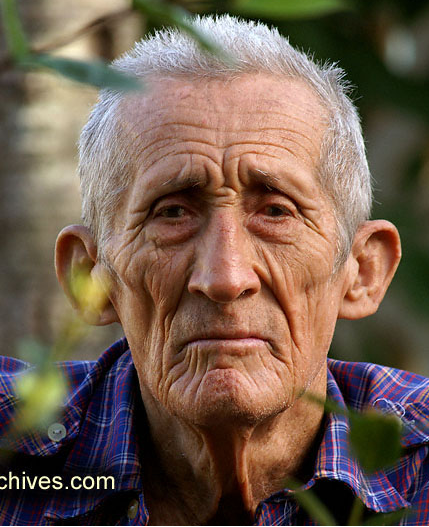

In [14]:
if image_data_uri:
    display(HTML(f'<img src="{image_data_uri}" />'))
else:
    print("Could not retrieve image.")

Attempting to download file ID: 1vMEEzZ47iW9VWHXcTm3E3VOzBOY2y2a5 into memory...
Download to memory 100%.
File downloaded successfully to memory.


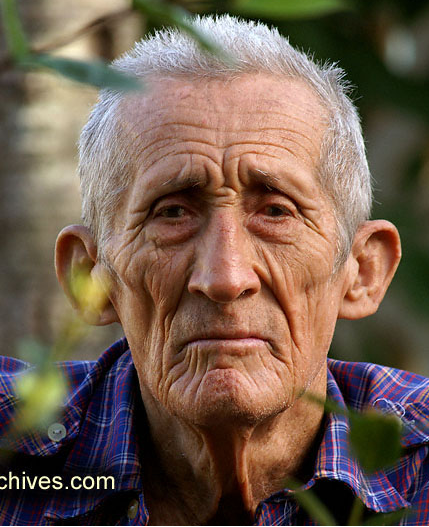

In [15]:
image_bytes = get_image_bytes_by_id(service, image_id)
if image_bytes:
    display(Image(data=image_bytes))
else:
    print("Could not retrieve image.")